<font color="#04B404"><h1 align="center">Máster en Big Data y Data Science</h1></font>
<font color="#6E6E6E"><h2 align="center">Análisis de datos</h2></font>

En esta práctica vamos a construir, con python, modelos sencillos de regresión lineal para predecir el valor de una variable y a partir de otra x. Jugaremos con distintos tipos de problemas y con distintos tipos de kernel para intentar responder a las cuestiones que se plantean a continuación. 

Para implementar los modelos utilizaremos la clase <a href="http://scikit-learn.org/stable/modules/generated/sklearn.kernel_ridge.KernelRidge.html#sklearn.kernel_ridge.KernelRidge">KernelRigde</a> del paquete *sklearn.kernel_ridge*. 

Para empezar, vamos a establecer el modo *inline* para las gráficas de *matplotlib*, vamos a importar las librerías *numpy* y *matplotlib.pyplot*, así como la clase *KernelRidge*, y vamos a fijar la semilla del generador de números aleatorios para que nuestros resultados sean reproducibles. 

In [ ]:
%matplotlib inline
import numpy as np
import numpy.matlib as matl
import matplotlib.pyplot as plt
from sklearn.kernel_ridge import KernelRidge
np.random.seed(13)

Lo que viene a continuación es la definición de la función que usaremos para crear los conjuntos de datos, que hemos llamado *createDataSet*. La función necesita los tres argumentos que se describen a continuación: 

- *n* es el número de puntos a generar
- *s* es la magnitud del ruido
- *model* es el modelo que genera los datos, puede ser 'linear', 'square' o 'sine'

In [ ]:
def createDataSet(n,s,model):
    x = np.random.rand(n, 1)*2.0*np.pi

    if model == 'sine':
        y = np.sin(x) + np.random.randn(n, 1)*s
    elif model == 'linear':
        y = x + np.random.randn(n, 1)*s
    elif model == 'square':
        y = x*x + np.random.randn(n, 1)*s
    else:
        y = x + np.random.randn(n, 1)*s
    
    return x, y

También vamos a crear una función para dibujar gráficas.

In [ ]:
def plotData(x,y,style,taxis,title):
    plt.plot(x,y,style)
    plt.grid(True)
    plt.axis(taxis)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(title)

En primer lugar vamos a crear un problema lineal con dos conjuntos de datos, uno de entrenamiento y otro de test.

In [ ]:
noise = 0.2
model = 'linear'
xtrain, ytrain = createDataSet(10, noise, model)
xtest, ytest = createDataSet(10, noise, model)

La siguiente celda muestra las gráficas de *y* frente a *x* para los dos conjuntos de datos generados. 

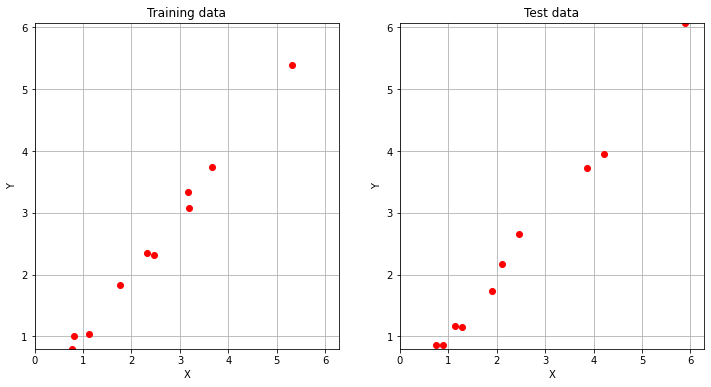

In [ ]:
# Ejes comunes a las dos figuras:
taxis = [0, 2*np.pi, min(ytrain.min(), ytest.min()), max(ytrain.max(), ytest.max())]

plt.figure(figsize=(12,6))

# Figura para los datos de training:
plt.subplot(121)
plotData(xtrain,ytrain,'ro',taxis,"Training data")

# Figura para los datos de test:
plt.subplot(122)
plotData(xtest,ytest,'ro',taxis,"Test data")

A continuación creamos el modelo de regresión utilizando la clase <a href="http://scikit-learn.org/stable/modules/generated/sklearn.kernel_ridge.KernelRidge.html#sklearn.kernel_ridge.KernelRidge">KernelRidge</a>. El constructor de la clase requiere los siguientes parámetros: 

- *alpha*, es un parámetro de regularización, valores más altos implican modelos más simples

- *kernel*, es el tipo de kernel, en esta práctica usaremos los valores 'poly' (para kernels polinómicos) y 'rbf' (para kernels RBF)

- *degree*, valor del exponente P en el kernel polinómico

- *coef0*, valor de la constante C en el kernel polinómico

- *gamma*, valor del parámetro del kernel RBF, equivale a $1/2\sigma^{2}$ en la notación que hemos usado nosotros

Empezamos con un modelo lineal, para ello elegimos *kernel='poly'*, *degree=1* y *coef0=1*. El valor de *alpha* lo ponemos a 0.001, y el valor de *gamma* es irrelevante.

In [ ]:
clf = KernelRidge(alpha=0.001, kernel='poly', degree=1, coef0=1, gamma=None)

Para ajustar el modelo a los datos utilizamos el método *fit* pasándole los datos del conjunto de entrenamiento.

In [ ]:
clf.fit(xtrain, ytrain)

KernelRidge(alpha=0.001, coef0=1, degree=1, gamma=10, kernel='poly',
            kernel_params=None)

A continuación vamos a aplicar el modelo para predecir la variable y a partir de x, tanto en los datos de entrenamiento como en los de test. Para eso usamos el método *predict*.

In [ ]:
ytrain_pred = clf.predict(xtrain)
ytest_pred = clf.predict(xtest)

Ahora vamos a calcular el error cometido tanto en el conjunto de entrenamiento como en el de test. Para ello comparamos los valores reales de *y* con los obtenidos a partir del modelo.

In [ ]:
error_train = np.mean((ytrain-ytrain_pred)*(ytrain-ytrain_pred))
print("Error de entrenamiento = %f" % (error_train))
error_test = np.mean((ytest-ytest_pred)*(ytest-ytest_pred))
print("Error de test = %f" % (error_test))

Error de entrenamiento = 0.011625
Error de test = 0.022973


Y finalmente vamos a volver a pintar los datos, pero superponiendo una gráfica que representa el modelo obtenido (línea azul).

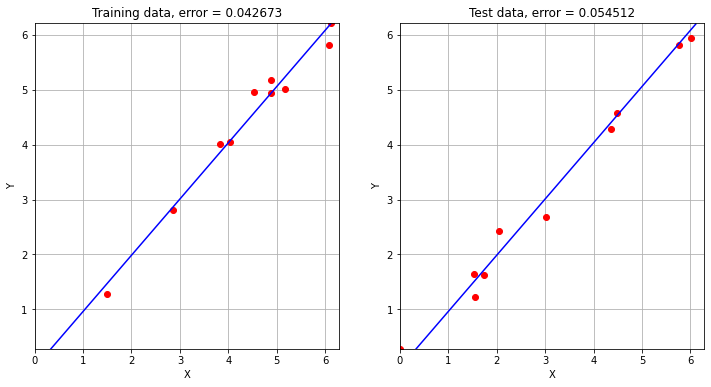

In [ ]:
# Variables para el plot del modelo
xplot = np.linspace(min(xtrain.min(),xtest.min()),max(xtrain.max(),xtest.max()),num=100)[:, None]
yplot = clf.predict(xplot)

plt.figure(figsize=(12,6))

# Figura para los datos de training:
plt.subplot(121)
plotData(xtrain,ytrain,'ro',taxis,"")
plotData(xplot,yplot,'b-',taxis,"Training data, error = %f" % (error_train))

# Figura para los datos de test:
plt.subplot(122)
plotData(xtest,ytest,'ro',taxis,"")
plotData(xplot,yplot,'b-',taxis,"Test data, error = %f" % (error_test))

La celda que sigue contiene todo el código anterior junto, para que te resulte más fácil hacer pruebas. Puedes obtener distintos conjuntos de datos y ajustar distintos modelos simplemente editando el código que aparece en ella. Los comentarios en el código indican los parámetros con los que te sugerimos que juegues. Haz las pruebas necesarias y responde a las preguntas planteadas al final.

Error de entrenamiento = 24.709299
Error de test = 27.974184


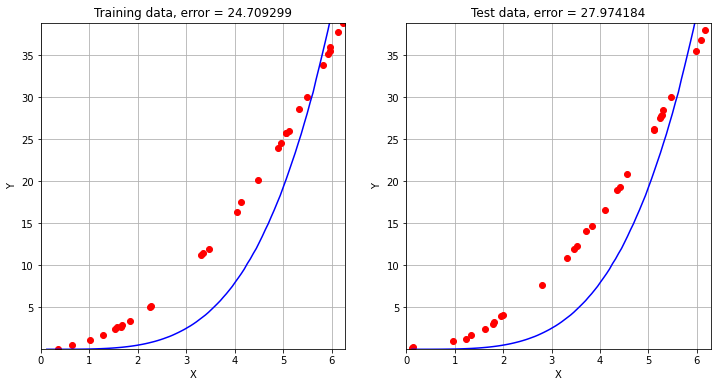

In [ ]:
# Generación de los datos:
# Puedes jugar con el tipo de modelo, 'linear', 'sine' o 'square', y con 
# el nivel de ruido.
noise = 0.2
model = 'square'
xtrain, ytrain = createDataSet(30, noise,model)
xtest, ytest = createDataSet(30, noise,model)

#ytrain = ytrain + 2
#ytest = ytest + 2

# Construcción del modelo:
# Puedes jugar con los parámetros de KernelRidge.
clf = KernelRidge(alpha=0.001, kernel='poly', degree=4, coef0=0, gamma=10)
clf.fit(xtrain, ytrain)
ytrain_pred = clf.predict(xtrain)
ytest_pred = clf.predict(xtest)

# Cálculo del error:
error_train = np.mean((ytrain-ytrain_pred)*(ytrain-ytrain_pred))
print("Error de entrenamiento = %f" % (error_train))
error_test = np.mean((ytest-ytest_pred)*(ytest-ytest_pred))
print("Error de test = %f" % (error_test))

# Variables para el plot del modelo
xplot = np.linspace(min(xtrain.min(),xtest.min()),max(xtrain.max(),xtest.max()),num=100)[:, None]
yplot = clf.predict(xplot)

# Gráficas:
taxis = [0, 2*np.pi, min(ytrain.min(), ytest.min()), max(ytrain.max(), ytest.max())]
plt.figure(figsize=(12,6))

# Para los datos de training:
plt.subplot(121)
plotData(xtrain,ytrain,'ro',taxis,"")
plotData(xplot,yplot,'b-',taxis,"Training data, error = %f" % (error_train))

# Para los datos de test:
plt.subplot(122)
plotData(xtest,ytest,'ro',taxis,"")
plotData(xplot,yplot,'b-',taxis,"Test data, error = %f" % (error_test))

**Responde razonadamente a las siguientes cuestiones:**

(1) Ejecuta el código con los valores iniciales, y luego cambiando el valor del exponente a diferentes valores entre 1 y 5. 

  - ¿Con qué kernel se obtiene un mejor resultado sobre el conjunto de entrenamiento?
  
  - ¿Con qué kernel se obtiene un mejor resultado sobre el conjunto de test?
  
  
(2) Cambia el valor del parámetro C a 0 y ejecuta de nuevo las pruebas anteriores. Compara los resultados con los que obtuviste antes y explica las diferencias observadas.


(3) Finalmente cambia el tipo de kernel a RBF (prueba con diferentes valores del parámetro gamma) y explica lo que observas.


(4) Repite las pruebas anteriores con los otros dos tipos de problemas ('square' y 'sine') y explica lo que observas. Indica los parámetros que funcionan mejor para cada uno de los problemas.


(5) Si quieres, prueba a jugar con otros parámetros (parámetro de regularización, número de puntos, nivel de ruido) e intenta explicar lo que sucede en cada caso.